# Mod 1 - Housing Data Project

### Importing data

In [34]:
import numpy as np
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head()
#previewing data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Data Cleaning

#### Checking datatypes for variables

In [35]:
df.info()
#checking datatypes
#date and sqft_basement columns need reformatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


##### Converting date column to datetime object

In [36]:
df.date = pd.to_datetime(df['date'], format = '%m/%d/%Y')

##### Converting sqft_basement to integer

In [37]:
pd.DataFrame(df.sqft_basement.value_counts()).head()
#checking for unusual values

,sqft_basement
0.0,12826
?,454
600.0,217
500.0,209
700.0,208


In [38]:
((len(df.loc[df.sqft_basement == '?']) / df.shape[0])) * 100 
#checking proportion of sqft_basement equal to ?
#small but not negligible so needs to be replaced

2.1021438162707784

In [39]:
unknown_base = df.loc[df.sqft_basement == '?', ['sqft_living']].mean()[0]
zero_base = df.loc[df.sqft_basement == '0.0', ['sqft_living']].mean()[0]
non_zero_base = df.loc[(df.sqft_basement != '0.0') & (df.sqft_basement != '?') , ['sqft_living']].mean()[0]
print('?: {}, zero: {}, non-zero: {}'.format(unknown_base, zero_base, non_zero_base))
#sqft_basement should be strongly correlated with sqft_living
#check if zero is a suitable replacement
#mean sqft_living values are similar for ? and zero sqft basement values so suitable replacement

?: 2052.431718061674, zero: 1929.953609854982, non-zero: 2313.7335577732356


In [40]:
df.loc[df.sqft_basement == '?', ['sqft_basement']] = '0.0'
#replacing ? values with zero

In [41]:
df.sqft_basement = df.sqft_basement.astype('float64').astype('int64')
#converting sqft_basement column to integer format

#### Checking for missing values

In [42]:
missing_values = pd.DataFrame(df.isna().sum())
missing_values.loc[missing_values[0] > 0].sort_values(by = 0, ascending = False)
#large number of missing values for yr_renovated and waterfront columns
#small number of missing values for view column

,0
yr_renovated,3842
waterfront,2376
view,63


##### Dealing with missing waterfront values

In [43]:
water_corr = pd.DataFrame(df.drop(labels = ['price'], axis = 1).corr().waterfront)
water_corr.sort_values(by = 'waterfront', ascending = False).head()
#checking for correlations with other predictors
#waterfront is most strongly correlated with view 

,waterfront
waterfront,1.000000
view,0.406654
sqft_living,0.110230
sqft_living15,0.088860
sqft_basement,0.088213


In [44]:
null_water = df.loc[df.waterfront.isnull(), ['view']].mean()[0]
zero_water = df.loc[df.waterfront == 0, ['view']].mean()[0]
non_zero_water = df.loc[df.waterfront > 0, ['view']].mean()[0]
print('null: {}, zero: {}, non-zero: {}'.format(null_water, zero_water, non_zero_water))
#mean view values similar for null and zero waterfront values so suitable replacement

null: 0.25654008438818565, zero: 0.20395394079604606, non-zero: 3.786206896551724


In [45]:
df.waterfront.fillna(0, inplace = True)
#replacing missing waterfront values with zero

In [46]:
df.waterfront.isna().sum()
#checking if missing waterfront values replaced

0

##### Dealing with missing year renovated values

In [47]:
renovated_corr = pd.DataFrame(df.drop(labels = ['price'], axis = 1).corr().yr_renovated)
renovated_corr.sort_values(by = 'yr_renovated', ascending = False).head()
#checking for correlations with other predictors
#no strong correlations

,yr_renovated
yr_renovated,1.000000
view,0.100964
waterfront,0.081397
sqft_basement,0.071190
zipcode,0.069846


In [48]:
pd.DataFrame(df.yr_renovated.value_counts(normalize=True)).head()
#checking for common yr_renovated values
#a large proportion of values are zero so replace

,yr_renovated
0.0,0.958096
2014.0,0.004112
2003.0,0.001746
2013.0,0.001746
2007.0,0.001690


In [49]:
df.yr_renovated.fillna(0, inplace = True)
#replacing missing yr_renovated values with zero

In [50]:
df.yr_renovated.isna().sum()
#checking if missing yr_renovated values replaced

0

##### Dealing with missing view values

In [51]:
len(df.loc[df.view.isnull()])/df.shape[0] * 100 
#checking proportion of missing view values
#negligible proportion so reasonable to remove

0.29170718155299347

In [52]:
df.drop(labels = df.loc[df.view.isnull()].index, axis = 0, inplace = True)
#removing missing view values

In [53]:
df.view.isna().sum() 
#checking if missing view values removed

0

#### Checking for outliers

In [54]:
df.describe() 
#inspecting aggregregte statistics for each column
#appears to be unusually high values for bedroom, bathroom, sqft_lot and sqft_lot15 columns

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.006734,0.233863,3.409724,7.657425,1788.557537,285.244311,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.081783,0.765686,0.650654,1.172643,827.745641,439.334095,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##### Dealing with bedroom outliers

In [55]:
pd.DataFrame(df[['bedrooms']]).sort_values(by = 'bedrooms', ascending= False).head()
#top value considerably larger than rest

,bedrooms
15856,33
8748,11
19239,10
15147,10
13301,10


In [56]:
df.drop(labels = df.loc[df.bedrooms == df.bedrooms.max()].index, axis = 0, inplace=True)
#removing top bedroom value

##### Dealing with bathroom outliers

In [57]:
pd.DataFrame(df[['bathrooms']]).sort_values(by = 'bathrooms', ascending= False).head(10)
#large number of values around 8 so not necessary to remove

,bathrooms
12764,8.00
7245,8.00
9245,7.75
8537,7.50
8085,6.75
4020,6.75
20562,6.50
21490,6.50
14542,6.25
18288,6.25


##### Dealing with sqft_lot outliers

In [58]:
pd.DataFrame(df[['sqft_lot']]).sort_values(by = 'sqft_lot', ascending= False).head()
#top value considerably larger than rest

,sqft_lot
1717,1651359
17305,1164794
7640,1074218
7762,1024068
3945,982998


In [59]:
df.drop(labels = df.loc[df.sqft_lot == df.sqft_lot.max()].index, axis = 0, inplace=True)
#removing top sqft_lot value

##### Dealing with sqft_lot15 outliers

In [60]:
pd.DataFrame(df[['sqft_lot15']]).sort_values(by = 'sqft_lot15', ascending= False).head(10)
#top three values are considerably larger than rest

,sqft_lot15
9705,871200
20436,858132
13451,560617
8655,438213
3797,434728
19141,422967
6685,411962
15606,392040
21415,392040
17645,386812


In [61]:
df.drop(labels = df.loc[df.sqft_lot15 == df.sqft_lot15.max()].index, axis = 0, inplace=True)
df.drop(labels = df.loc[df.sqft_lot15 == df.sqft_lot15.max()].index, axis = 0, inplace=True)
df.drop(labels = df.loc[df.sqft_lot15 == df.sqft_lot15.max()].index, axis = 0, inplace=True)
#removing top three sqft_lot values

### Exploratory Data Analysis

#### What are the characteristics of cheap, average and  expensive houses?

##### Does location have an impact on price?

In [62]:
mean_zipcodes = df.groupby(by = 'zipcode')[['lat','long', 'price']].mean()
mean_zipcodes.head()
#calculating the mean latitude, longitude and price for each zipcode

,lat,long,price
zipcode,,,
98001,47.309119,-122.270713,2.808812e+05
98002,47.308780,-122.213357,2.342840e+05
98003,47.315741,-122.310054,2.941113e+05
98004,47.616227,-122.205190,1.358522e+06
98005,47.611532,-122.167268,8.102897e+05


In [63]:
mean_prices_aggregates = pd.DataFrame(mean_zipcodes.price.describe()).reset_index()
mean_prices_lower = float(mean_prices_aggregates.loc[mean_prices_aggregates['index'] == '25%', ['price']]['price'])
mean_prices_upper = float(mean_prices_aggregates.loc[mean_prices_aggregates['index'] == '75%', ['price']]['price'])
#calculating upper and lower quartiles for mean prices
mean_zipcodes['price_band'] = mean_zipcodes.price.apply(lambda x: 'cheap' if x < mean_prices_lower else ('expensive' if x > mean_prices_upper else 'average'))
mean_zipcodes.head()
#grouping zipcodes into mean price bands

,lat,long,price,price_band
zipcode,,,,
98001,47.309119,-122.270713,2.808812e+05,cheap
98002,47.308780,-122.213357,2.342840e+05,cheap
98003,47.315741,-122.310054,2.941113e+05,cheap
98004,47.616227,-122.205190,1.358522e+06,expensive
98005,47.611532,-122.167268,8.102897e+05,expensive


In [64]:
import folium

map_centre = [float(mean_zipcodes.lat.mean()), float(mean_zipcodes.long.mean())]
map_background = folium.Map(location = map_centre, zoom_start = 9)
folium.TileLayer('cartodbpositron').add_to(map_background)
folium.CircleMarker(location = map_centre , radius = 10, color = 'black').add_to(map_background) 

for zipcode, row in mean_zipcodes.iterrows():
    if row['price_band'] == 'cheap':
        folium.CircleMarker(location = [row['lat'], row['long']] , radius = 2, color = 'green').add_to(map_background) 
    if row['price_band'] == 'average':
        folium.CircleMarker(location = [row['lat'], row['long']] , radius = 2, color = 'yellow').add_to(map_background)
    if row['price_band'] == 'expensive':
        folium.CircleMarker(location = [row['lat'], row['long']] , radius = 2, color = 'red').add_to(map_background)
map_background

#plotting zipcodes on a map, colour coded by price band
#appears that zipcodes in extreme price bands are typically close to each other geographically

##### Does the density of the house have an impact on price

We have chosen to characterise the density of the houses using the coeficient of occupancy (i.e. the amount of living space per unit lot area).

Our initial expectation is that houses with a greater density will have a lower price on average. This is because we assume that the quality of the build has been comprised to optimise living space in order to address housing shortages.

In [65]:
df['occupancy_coef'] = df['sqft_living'] / df['sqft_lot']
#creating a new column for occupancy coefficient
df['price_band'] = df.price.apply(lambda x: 'cheap' if x < mean_prices_lower else ('expensive' if x > mean_prices_upper else 'average'))
density_df = df[['occupancy_coef', 'price_band']]
density_df = density_df.loc[df['occupancy_coef'] < 1]
density_df.head()

,occupancy_coef,price_band
0,0.208850,cheap
1,0.354874,average
2,0.077000,cheap
3,0.392000,average
4,0.207921,average


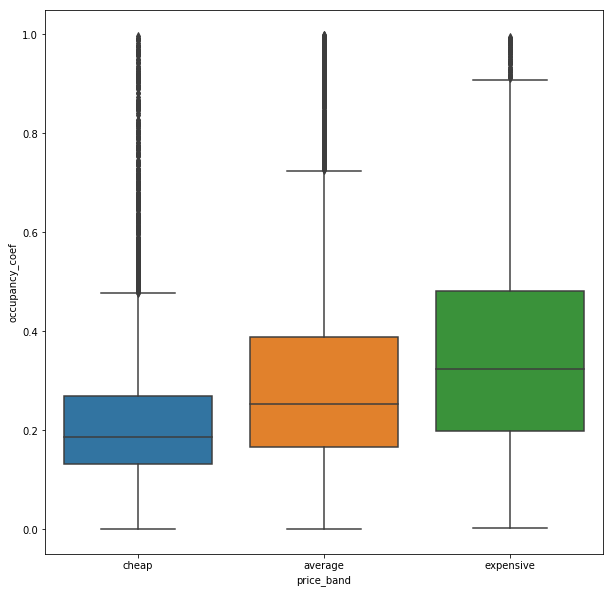

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.boxplot(x='price_band', y='occupancy_coef', data=density_df, order = ['cheap', 'average', 'expensive'])

After plotting the distributions of the occupancy coefficients for each price band we observe that the density appears to increase as the price increases. This is contray to our initial expectations. This could be attributed to fact that the lot areas tend to be larger for more expensive houses so they are likely to have larger gardens despite using a larger proportion of the lot for living space.

We also observe that the variance in the occupancy coefficient increases as the price increases. This suggests that the owners of more expensive houses have more scope to decide how to use their lot space.

##### Does renovation have an impact on the price of a house?

Our initial expectation is that houses that have been renovated will tend to be more expensive than those without. It is important for this comparison to be valid that some defining characteristics of the houses have been kept the same. In this case we have decided to keep the number of bedrooms constant.

In [71]:
df['renovated'] = df.yr_renovated.map(lambda x: 0 if x == 0 else 1) 
#creating a new column that distinguishes between houses that have been renovated and those without.

In [74]:
df['bedrooms'].value_counts()
#looking for the most common value for the number of bedrooms

3     9790
4     6862
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [75]:
df.loc[df['bedrooms'] == 3].renovated.value_counts()
#comparing the number of renovated houses against those without
#considerable difference so will take an equal sized sample from non-renovated houses

0    9489
1     301
Name: renovated, dtype: int64

In [85]:
non_renovated_three_bed = df.loc[(df['bedrooms'] == 3) & (df['renovated'] == 1)]
renovated_three_bed = df.loc[(df['bedrooms'] == 3) & (df['renovated'] == 0)].sample(n = 301, random_state = 1)
three_bed_merged = pd.concat([non_renovated_three_bed, renovated_three_bed])
three_bed_merged['renovated'].value_counts()

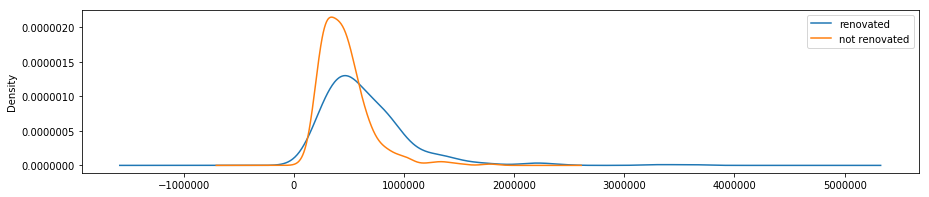

In [88]:
plt.figure(figsize=(15,3))
three_bed_merged[three_bed_merged.renovated==1]['price'].plot.kde(label = 'renovated', legend = True)
three_bed_merged[three_bed_merged.renovated==0]['price'].plot.kde(label = 'not renovated', legend = True)
plt.legend()

### Modelling

#### Inspecting correlations between predictors and price

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
sns.heatmap(df.drop(labels = ['id'], axis = 1).corr().round(2), cmap='RdYlGn_r', annot=True)
#sqft_living has largest correlation with price

#### Adding the first predictor to model

In [68]:
import statsmodels.api as sm
model = sm.OLS(df.price, df.sqft_living).fit()
model.summary()
#adding sqft_living predictor to model
#adjusted R^2 = 0.839
#all coefficients are statistically significant at the 5% level

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 1.126e+05
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        07:56:09   Log-Likelihood:            -2.9910e+05
No. Observations:               21529   AIC:                         5.982e+05
Df Residuals:                   21528   BIC:                         5.982e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   262.9891      0.784    335.489      0.000     261.453     264.526
==============================================================================
Omnibus:                    15748.539   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           650098.249
Skew:                           3.075   Prob(JB):                         0.00
Kurtosis:                      29.209   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Adding second predictor to model

In [69]:
sqft_living_corr = pd.DataFrame(df.corr().sqft_living)
sqft_living_corr.loc[model_df.sqft_living > 0.75].sort_values(by = 'sqft_living', ascending = False)
#inspecting predictors with collinearity above 0.75 with sqft_basement
#four predictors have a strong collinearity with sqft_basement

NameError: name 'model_df' is not defined

In [ ]:
df_model = df.drop(labels = ['sqft_living', 'sqft_above', 'grade', 'bathrooms', 'sqft_living15'], axis = 1)
#dropping predictors with high collinearity

In [ ]:
pd.DataFrame(df_model.corr().price).sort_values(by = 'price', ascending = False).head()
#view has the largest correlation with price

In [ ]:
model_2 = sm.OLS(df.price, df[['sqft_living', 'view']]).fit()
model_2.summary()
#adding view to model
#adjusted R^2 = 0.853
#adjusted R^2 has increased and all coefficients are statistically significant at the 5% level

#### Adding third predictor to model

In [ ]:
view_corr = pd.DataFrame(df_model.corr().view).sort_values(by = 'view', ascending = False).head()
view_corr.loc[view_corr.view > 0.75].sort_values(by = 'view', ascending = False)
#inspecting predictors with collinearity above 0.75 with view
#no predictors have a strong collinearity with view

In [ ]:
df_model = df_model.drop(labels = ['view'], axis = 1)
#dropping view predictor

In [ ]:
pd.DataFrame(df_model.corr().price).sort_values(by = 'price', ascending = False).head()
#sqft_basement has the largest correlation with price

In [ ]:
model_3a = sm.OLS(df.price, df[['sqft_living', 'view', 'sqft_basement']]).fit()
model_3a.summary()
#adding sqft_basement to model
#adjusted R^2 = 0.853
#adjusted R^2 has not increased so try next best predictor

In [ ]:
model_3b = sm.OLS(df.price, df[['sqft_living', 'view', 'bedrooms']]).fit()
model_3b.summary()
#adding bedrooms to model
#adjusted R^2 = 0.855
#adjusted R^2 has increased and all coefficients are statistically significant at the 5% level

#### Adding fourth predictor to model

In [ ]:
bedroom_corr = pd.DataFrame(df_model.corr().bedrooms).sort_values(by = 'bedrooms', ascending = False).head()
bedroom_corr.loc[bedroom_corr.bedrooms > 0.75].sort_values(by = 'bedrooms', ascending = False)
#inspecting predictors with collinearity above 0.75 with bedrooms
#no predictors have a strong collinearity with bedrooms

In [ ]:
df_model = df_model.drop(labels = ['sqft_basement', 'bedrooms'], axis = 1)
#dropping sqft_basement and bedroom predictors

In [ ]:
pd.DataFrame(df_model.corr().price).sort_values(by = 'price', ascending = False).head()
#latitude has the largest correlation with price

In [ ]:
model_4 = sm.OLS(df.price, df[['sqft_living', 'view', 'bedrooms', 'lat']]).fit()
model_4.summary()
#adding latitude to model
#adjusted R^2 = 0.857
#adjusted R^2 has increased and all coefficients are statistically significant at the 5% level

#### Adding fifth predictor to model

In [ ]:
latitude_corr = pd.DataFrame(df_model.corr().lat).sort_values(by = 'lat', ascending = False).head()
latitude_corr.loc[latitude_corr.lat > 0.75].sort_values(by = 'lat', ascending = False)
#inspecting predictors with collinearity above 0.75 with latitude
#no predictors have a strong collinearity with latitude

In [ ]:
df_model = df_model.drop(labels = ['lat'], axis = 1)
#dropping latitude predictor

In [ ]:
pd.DataFrame(df_model.corr().price).sort_values(by = 'price', ascending = False).head()
#waterfront has the largest correlation with price

In [ ]:
model_5 = sm.OLS(df.price, df[['sqft_living', 'view', 'bedrooms', 'lat', 'waterfront']]).fit()
model_5.summary()
#adding waterfront to model
#adjusted R^2 = 0.861
#adjusted R^2 has increased and all coefficients are statistically significant at the 5% level

#### Adding a sixth predictor to model

In [ ]:
waterfront_corr = pd.DataFrame(df_model.corr().waterfront).sort_values(by = 'waterfront', ascending = False).head()
waterfront_corr.loc[waterfront_corr.waterfront > 0.75].sort_values(by = 'waterfront', ascending = False)
#inspecting predictors with collinearity above 0.75 with waterfront
#no predictors have a strong collinearity with waterfront

In [ ]:
df_model = df_model.drop(labels = ['waterfront'], axis = 1)
#dropping waterfront predictor

In [ ]:
pd.DataFrame(df_model.corr().price).sort_values(by = 'price', ascending = False).head()
#floors has the largest correlation with price

In [ ]:
model_6a = sm.OLS(df.price, df[['sqft_living', 'view', 'bedrooms', 'lat', 'waterfront', 'floors']]).fit()
model_6a.summary()
#adding floors to model
#adjusted R^2 = 0.861
#adjusted R^2 has not increased so try next best predictor

In [ ]:
model_6b = sm.OLS(df.price, df[['sqft_living', 'view', 'bedrooms', 'lat', 'waterfront', 'yr_renovated']]).fit()
model_6b.summary()
#adding yr_renovated to model
#adjusted R^2 = 0.862
#adjusted R^2 has increased but only marginally so stop adding predictors to model

#### Extensions

##### Using feature engineering to deal with high conditional number

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(df[['sqft_living', 'view', 'bedrooms', 'lat', 'waterfront']].corr().round(2), cmap='RdYlGn_r', annot=True)
#sqft_living and bedrooms have a reasonable high collinearity
#create a new predictor from sqft_living and bedrooms

In [ ]:
df['sqft_living_per_bed'] = df['sqft_living'] / df['bedrooms']

In [ ]:
model_7 = sm.OLS(df.price, df[['sqft_living_per_bed', 'view', 'lat', 'waterfront']]).fit()
model_7.summary()
#adding sqft_living_per_bed predictor to model
#collinearity has decreased by an order of magnitude but adjusted R^2 has worsened

##### Using feature scaling to interpret coefficient values

### Extra Observations

In [ ]:
impossible_floors = df.loc[((df['sqft_basement'] > 0) & (df['floors'] == 1))]
df.drop(impossible_floors.index, axis = 0, inplace = True)
#it is impossible for a house with a basement to have only one floor

In [ ]:
#import pandas_profiling as pp 

In [ ]:
#df.profile_report(style={'full_width':True})